In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class DataSet:
    x_var: str = None
    y_var: str = None
    x: np.array = None
    y: np.array = None

    def __init__(self, filename: str, x_variable_name: str, y_variable_name: str):
        _df = pd.read_csv(filename)

        self.x_var: str = x_variable_name
        self.y_var: str = y_variable_name

        self.x = np.array(_df[self.x_var])
        self.y = np.array(_df[self.y_var])

In [3]:
class LinearModel:
    dataset = None
    beta = None

    def _eval_point_with_params(self, x):
        return self.beta * x

    def _calculate_beta(self) -> float:
        numerator = np.sum(self.dataset.x * self.dataset.y)
        denominator = np.sum(np.power(self.dataset.x, 2))

        return numerator / denominator

    def __init__(self, _dataset):
        self.dataset = _dataset
        self.beta = self._calculate_beta()

    def predict(self, x):
        return self._eval_point_with_params(x)

    def get_beta(self):
        return self.beta

    def plot(self):
        y_hat = self.predict(self.dataset.x)

        plt.grid()
        plt.plot(self.dataset.x, y_hat)
        plt.plot(self.dataset.x, self.dataset.y, '.')
        plt.show()

In [4]:
class BiasLinearModel:
    dataset = None
    beta = None
    bias = None

    def _eval_point_with_params(self, x):
        return self.beta * x + self.bias

    def _calculate_beta(self) -> float:
        x_mean = np.mean(self.dataset.x)
        y_mean = np.mean(self.dataset.y)

        numerator = np.sum((self.dataset.x * self.dataset.y) - (y_mean * self.dataset.x))
        denominator = np.sum(np.power(self.dataset.x, 2) - x_mean * self.dataset.x)

        return numerator / denominator

    def _calculate_bias(self) -> float:
        x_mean = np.mean(self.dataset.x)
        y_mean = np.mean(self.dataset.y)

        return y_mean - self.get_beta() * x_mean

    def __init__(self, _dataset):
        self.dataset = _dataset
        self.beta = self._calculate_beta()
        self.bias = self._calculate_bias()

    def predict(self, x):
        return self._eval_point_with_params(x)

    def get_beta(self):
        return self.beta

    def get_bias(self):
        return self.bias

    def plot(self):
        y_hat = self.predict(self.dataset.x)

        plt.grid()
        plt.plot(self.dataset.x, y_hat)
        plt.plot(self.dataset.x, self.dataset.y, '.')
        plt.show()

In [5]:
class StatisticalMeasures:

    @staticmethod
    def mse(model: LinearModel | BiasLinearModel):
        y_hat = model.predict(model.dataset.x)
        terms = np.power(y_hat - model.dataset.x, 2)
        accm = np.sum(terms)
        return accm

    @staticmethod
    def r_squeared(model: LinearModel | BiasLinearModel):
        y_mean = np.mean(model.dataset.y)
        y_hat = model.predict(model.dataset.x)

        numerator = np.sum(np.power(model.dataset.y - y_hat, 2))
        denominator = np.sum(np.power(model.dataset.y - y_mean, 2))
        return 1 - numerator / denominator

In [6]:
dataset = DataSet("./dataset/spotify-sample.csv", "streams(hundreds of thousands)", "in_spotify_playlists(thousands)")

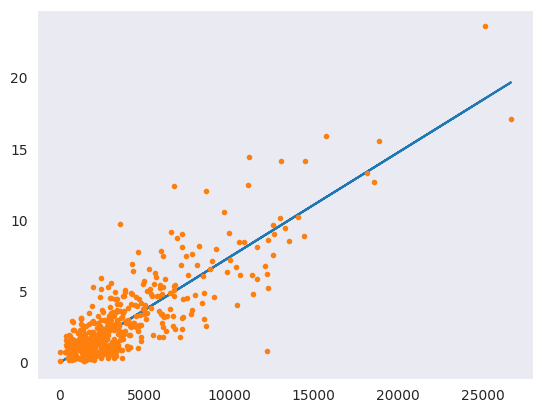

0.0007370945213834327
0.7202454712152968


In [7]:
linear_model = LinearModel(dataset)
linear_model.plot()
print(linear_model.get_beta())
print(StatisticalMeasures.r_squeared(linear_model))

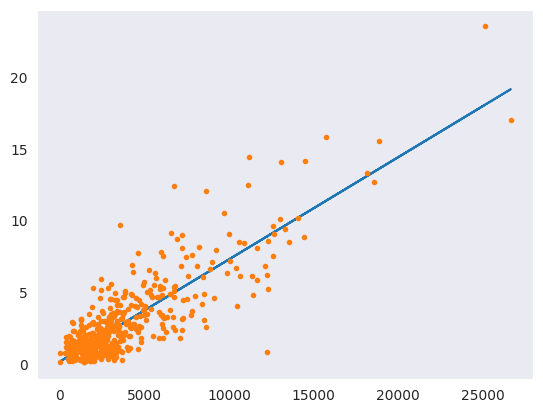

0.0007141004053993129
0.1566145567368058
0.721641373403032


In [8]:
bias_linear_model = BiasLinearModel(dataset)
bias_linear_model.plot()

print(bias_linear_model.get_beta())
print(bias_linear_model.get_bias())

print(StatisticalMeasures.r_squeared(bias_linear_model))